# BL40A2010 Introduction to IoT-Based Systems

## Assignment 5, 19.02.2023

### Author: Semen Koveshnikov

**(1) Create two arrays with 10000 samples generated as [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) random variables via [Numpy](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html) similar to what we have done with Poisson random variables in the tutorial considering the following paramenters of the Binomial function:**

**(a) $n=100$ and $p=0.3$;**

**(b) $n=10000$, and $p=0.6$**


**Make the histogram (empirical) plots related to each vector and compare them with the analytical results with the probability distribution funtion given by:**

**$$\mathrm{Prob}\left[X = k \right] = \binom{n}{k}p^k(1-p)^{n-k},$$ where $k$ is the number of *successes* in $n$ trials.**

**Remember to use this [scipy.stats.binom](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) in a similar way we did in the tutorial with Poisson.**

In [164]:
#libs import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import binom
import networkx as nx

[Text(0.5, 1.0, 'Binomial Distribution, $n=100, p=0.3, N=10000$'),
 Text(0.5, 0, '$n$'),
 Text(0, 0.5, 'Sample density, $p_k*N$')]

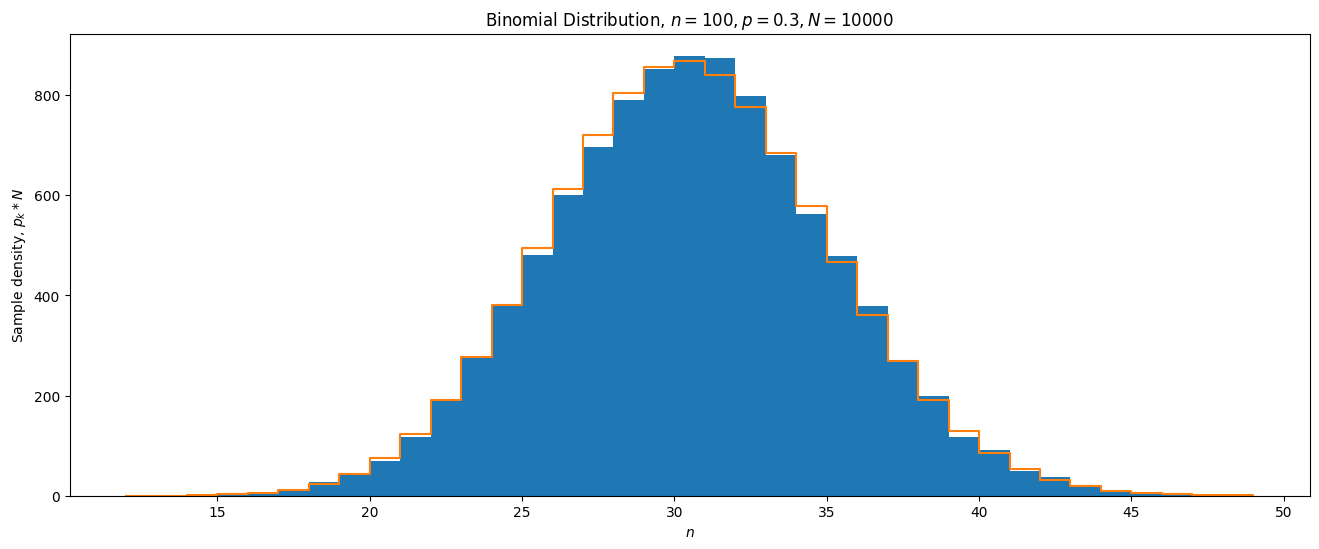

In [163]:
# (a) n=100, p=0.3
n=100
p=0.3
A=np.random.binomial(n,p,size=10000)
A_bins=np.max(A)-np.min(A)
#analytical
a=np.arange(binom.ppf(0.00001, n, p),
              binom.ppf(0.99999, n, p))
fig, ax = plt.subplots(figsize=(16,6))
plt.hist(A,A_bins)
ax.step(a, binom.pmf(a, n, p)*10000,where='post')
ax.set(title='Binomial Distribution, $n=100, p=0.3, N=10000$',
 xlabel='$n$',ylabel='Sample density, $p_k*N$')

[Text(0.5, 1.0, 'Binomial Distribution, $n=10000, p=0.6, N=10000$'),
 Text(0.5, 0, '$n$'),
 Text(0, 0.5, 'Sample density, $p_k*N$')]

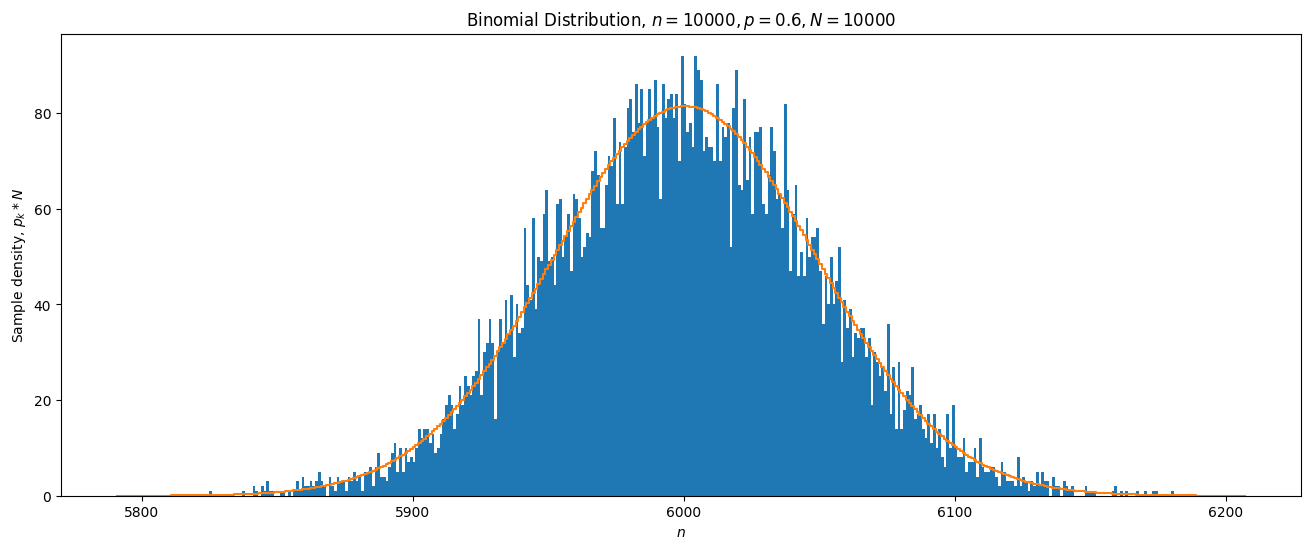

In [160]:
# (b) n=10000, p=0.6
n=10000
p=0.6
B=np.random.binomial(n,p,10000)
B_bins=np.max(B)-np.min(B)
#analytical
b=np.arange(binom.ppf(0.00001, n, p),
              binom.ppf(0.99999, n, p))
fig, ax = plt.subplots(figsize=(16,6))
plt.hist(B,B_bins)
ax.step(b, binom.pmf(b, n, p)*10000, ms=8, where='post')
ax.set(title='Binomial Distribution, $n={0}, p={1}, N=10000$'.format(n,p),
 xlabel='$n$',ylabel='Sample density, $p_k*N$')

As can be seen from the noisy graph, the *Binomial distribution* is not suitable for large networks (here, for a large number of trials), as $n>>k$ and *Poisson* should be used. Whereas for smaller networks, e.g. $n=10^2$, exact *Binomial distribution* is the choice.

**(2) Read Section 2.3 and Chapter 3 from [Network Science](http://networksciencebook.com/) and generate three different kinds of Erdos-Renyi graphs with $N=15$ (fifteen nodes) using [NetworkX](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html?highlight=erdos#networkx.generators.random_graphs.erdos_renyi_graph). 
The networks shall be (a)  with probability $p=0.2$, (b) with probability $p=0.5$ and (c) with probability $p=0.8$. What are the differences you see if these graphs represent communication networks.**

In [169]:
#gen graphs
N=15
p=[0.2, 0.5, 0.8]
G=[]
for i in p:
    G.append(nx.erdos_renyi_graph(N,i))


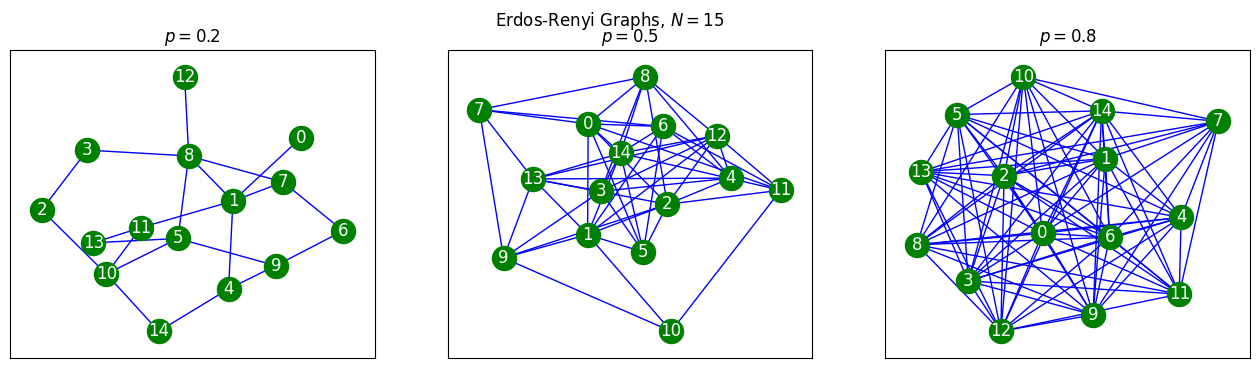

In [202]:
#plot
fig, axs = plt.subplots(1,3)
fig.set(figwidth=16,figheight=4)
fig.suptitle('Erdos-Renyi Graphs, $N=15$')
axs[0].set(title='$p={0}$'.format(p[0]))
axs[1].set(title='$p={0}$'.format(p[1]))
axs[2].set(title='$p={0}$'.format(p[2]))
plt.subplot(1,3,1)
nx.draw_networkx(G[0],node_color='green',edge_color='blue',font_color='white')
plt.subplot(1,3,2)
nx.draw_networkx(G[1],node_color='green',edge_color='blue',font_color='white')
plt.subplot(1,3,3)
nx.draw_networkx(G[2],node_color='green',edge_color='blue',font_color='white')

With higher probability $p$ graphs have higher number of edges (links). That is, nodes have more connections to other nodes, decreasing diameter of the network.

In [207]:
for g in G:
    print('Diameter of {0} = {1}'.format(g,nx.diameter(g)))

Diameter of Graph with 15 nodes and 21 edges = 4
Diameter of Graph with 15 nodes and 52 edges = 3
Diameter of Graph with 15 nodes and 91 edges = 2
